# 1.Setup

In [64]:
import utils_csv
import utils_feature_engine
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
tf.random.set_seed(123)

# 2.数据

## 2.1 鸢尾花数据

In [65]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
CSV_TARGET_NAMES = "Species"
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header = 0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)
train_y = train.pop(CSV_TARGET_NAMES)
test_y = test.pop(CSV_TARGET_NAMES)
train.head()
train_y.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

## 2.2 泰坦尼克号数据

In [66]:
BATCH_SIZE = 12
NUM_EPOCHS = 1
CSV_COLUMNS = [
    'survived', 
    'sex', 
    'age', 
    'n_siblings_spouses', 
    'parch', 
    'fare', 
    'class', 
    'deck', 
    'embark_town', 
    'alone'
]
LABEL_COLUMN = "survived"
LABELS = [0, 1]

# TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
# TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"
TRAIN_DATA_URL = "~/.keras/datasets/train.csv"
TEST_DATA_URL = "~/.keras/datasets/test.csv"
train_file_path, test_file_path = utils_csv.get_csv_path(TRAIN_DATA_URL, "train.csv", TEST_DATA_URL, "test.csv")
train = utils_csv.get_csv_dataset(train_file_path, CSV_COLUMNS, LABEL_COLUMN, BATCH_SIZE, NUM_EPOCHS)
test = utils_csv.get_csv_dataset(test_file_path, CSV_COLUMNS, LABEL_COLUMN, BATCH_SIZE, NUM_EPOCHS)

In [67]:
CSV_COLUMN_NAMES = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']
CSV_TARGET_NAMES = "survived"
SURVIVED = ["1", "0"]

train_path = tf.keras.utils.get_file(fname = "train.csv", origin = "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
test_path = tf.keras.utils.get_file(fname = "test.csv", origin = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header = 0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)
train_y = train.pop(CSV_TARGET_NAMES)
test_y = test.pop(CSV_TARGET_NAMES)
train.head()
y_train.head()
# train.shape
# test.shape
# train.describe()
# train.age.hist(bins = 20)
# train.sex.value_counts().plot(kind = "barh")
# train["class"].value_counts().plot(kind = "barh")
# pd.concat([train, y_train], axis = 1).groupby("sex").survived.mean().plot(kind = "barh").set_xlabel("% survive")

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

# 3.TensorFlow Estimator 编程

## 3.1 创建输入函数

## 3.2 定义特征列

### 3.2.1 鸢尾花数据-基本特征列

In [69]:
fc = tf.feature_column
CAETGORICAL_COLUMNS = []
NUMERIC_COLUMNS = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

feature_columns = []
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(utils_feature_engine.make_numeric_column(feature_name))
feature_columns

[NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='class', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='deck', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='embark_town', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='alone', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

### 3.2.2 泰坦尼克号数据-基本特征列

In [70]:
fc = tf.feature_column
CAETGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"]
NUMERIC_COLUMNS = ["age", "fare"]

feature_columns = []
for feature_name in CAETGORICAL_COLUMNS:
    vocabulary = train[feature_name].unique()
    feature_columns.append(utils_feature_engine.indicator_cat_column(feature_name, vocabulary))
    feature_columns.append(utils_feature_engine.one_hot_cat_column(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(utils_feature_engine.make_numeric_column(feature_name))

feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

### 3.2.3 泰坦尼克号数据-派生特征列

In [71]:
age_x_gender = tf.feature_column.crossed_column(["age", "sex"], hash_bucket_size = 100)
feature_columns += [age_x_gender]

## 3.3 实例化 Estimator

- `tf.estimator.DNNClassifier`: 用于多类别分类的深度模型
- `tf.estimator.DNNLinearCombinedClassifier`: 用于广度与深度模型
- `tf.estimator.LinearClassifier`: 用于基于线性模型的分类器

### 3.3.1 特征函数

In [72]:
train_input_fn = utils_feature_engine.make_input_function(train, train_y, training = True)
test_input_fn = utils_feature_engine.make_input_function(test, test_y, num_epochs = 1, training = False)

### 3.3.2 模型构建、训练

In [79]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)

clear_output()
print(result)

{'accuracy': 0.7083333, 'accuracy_baseline': 0.625, 'auc': 0.80293846, 'auc_precision_recall': 0.6969123, 'average_loss': 0.6215885, 'label/mean': 0.375, 'loss': 0.6828834, 'precision': 0.57746476, 'prediction/mean': 0.55690795, 'recall': 0.82828283, 'global_step': 25}


In [81]:
# classifier = tf.estimator.DNNClassifier(
#     feature_columns = feature_columns,
#     hidden_units = [30, 10],
#     n_classes = 2,
# )
# classifier.train(
#     input_fn = train_input_fn,
#     steps = 5000
# )
# test_result = classifier.evaluate(
#     input_fn = test_input_fn,
# )

# clear_output()
# print("\nTest set accuracy: {accuracy:0.3f}".format(**test_result))

In [84]:
# y_true = ['Setosa', 'Versicolor', 'Virginica']
# x_predict = {
#     'SepalLength': [5.1, 5.9, 6.9],
#     'SepalWidth': [3.3, 3.0, 3.1],
#     'PetalLength': [1.7, 4.2, 5.4],
#     'PetalWidth': [0.5, 1.5, 2.1],
# }
# y_predict = list(classifier.predict(input_fn = test_input_fn))
y_predict = list(linear_est.predict(input_fn = test_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/mg/50rhj31j7m955hzvnjqw0w1m0000gn/T/tmp22kz9fqz/model.ckpt-25
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
for pred_dict, expec in zip(y_predict, y_true):
    class_id = pred_dict["class_ids"][0]
    probability = pred_dict["probabilities"][class_id]
    print("Prediction is '{}' ({:.1f}%), expected '{}'".format(SPECIES[class_id], 100 * probability, expec))

Prediction is 'Virginica' (60.1%), expected 'Setosa'
Prediction is 'Virginica' (66.6%), expected 'Versicolor'
Prediction is 'Virginica' (52.7%), expected 'Virginica'


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

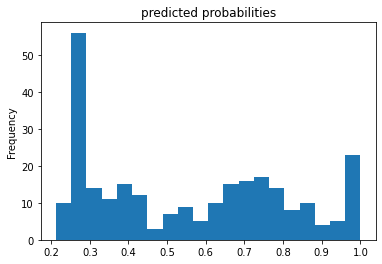

In [85]:
probs = pd.Series([pred["probabilities"][1] for pred in y_predict])
probs.plot(kind = "hist", bins = 20, title = "predicted probabilities")

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'false positive rate')

Text(0, 0.5, 'true positive rate')

(0.0, 1.05)

(0.0, 1.05)

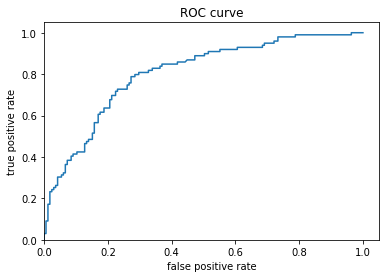

In [87]:
fpr, tpr, _ = roc_curve(test_y, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)